In [1]:
import pandas as pd

In [8]:
df=pd.read_csv(r'C:\Users\DELL\DSML Learning\CampusX\Dataset\Churn_Modelling.csv')

In [9]:
df.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8659,8660,15770631,Sutherland,730,Spain,Male,25,5,167385.81,1,1,1,56307.51,0
7226,7227,15614813,Cocci,777,Germany,Female,46,0,107362.80,1,1,0,487.30,0


In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7100,650,Spain,Male,24,8,108881.73,1,1,0,104492.83,0


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [22]:
ohe.fit(df[['Geography','Gender']])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [39]:
ohe.transform(df[['Geography','Gender']])

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [40]:
ohe.feature_names_in_

array(['Geography', 'Gender'], dtype=object)

In [41]:
ohe.get_feature_names_out(['Geography','Gender'])

array(['Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype=object)

In [43]:
df[['Geography_Germany','Geography_Spain','Gender_Male']]=pd.DataFrame(ohe.transform(df[['Geography','Gender']]),columns=ohe.get_feature_names_out(['Geography','Gender']))

In [44]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7130,599,Germany,Male,33,2,51949.95,2,1,0,85045.92,0,1.0,0.0,1.0
2088,595,Germany,Female,41,9,150463.11,2,0,1,81548.38,0,1.0,0.0,0.0


In [46]:
df.drop(columns=['Geography','Gender'],inplace=True)

In [47]:
df.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1371,611,43,8,64897.75,1,1,0,114996.33,0,0.0,0.0,0.0
1997,672,34,1,142151.75,2,1,1,168753.34,0,0.0,0.0,0.0


In [48]:
X=df.drop(columns=['Exited'])
y=df[['Exited']]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [97]:
print(df.shape)
print(X_train.shape)

(10000, 12)
(8000, 11)


In [103]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=11))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [106]:
history=model.fit(X_train,y_train,batch_size=32,verbose=1,epochs=20,validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7986 - loss: 0.5057 - val_accuracy: 0.7987 - val_loss: 0.4998
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7894 - loss: 0.5124 - val_accuracy: 0.7987 - val_loss: 0.4965
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7942 - loss: 0.5030 - val_accuracy: 0.7987 - val_loss: 0.4950
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7899 - loss: 0.5072 - val_accuracy: 0.7987 - val_loss: 0.4945
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7893 - loss: 0.5093 - val_accuracy: 0.7987 - val_loss: 0.4945
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7927 - loss: 0.5056 - val_accuracy: 0.7987 - val_loss: 0.4948
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7847 - loss: 0.5139 - val_accuracy: 0.7987 - val_loss: 0.4952
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7870 - loss: 0.5126 - val_acc

In [107]:
model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step  


array([[0.25340372],
       [0.1712375 ],
       [0.1712375 ],
       ...,
       [0.1712375 ],
       [0.1712375 ],
       [0.24272203]], dtype=float32)

In [109]:
import numpy as np

In [116]:
y_prd=model.predict(X_test).argmax(axis=-1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 


In [117]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_prd)

In [118]:
acc

0.8035

In [119]:
import seaborn as sns

<Axes: >

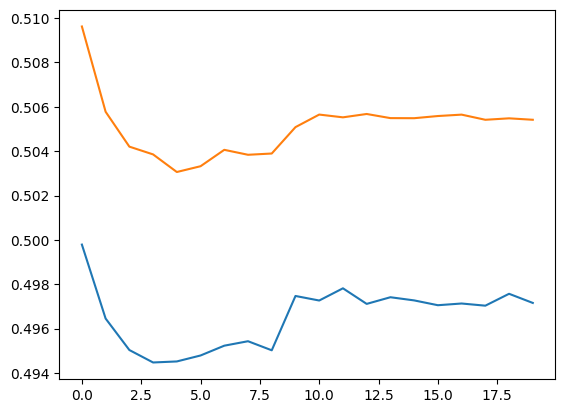

In [121]:
sns.lineplot(history.history['val_loss'])
sns.lineplot(history.history['loss'])

<Axes: >

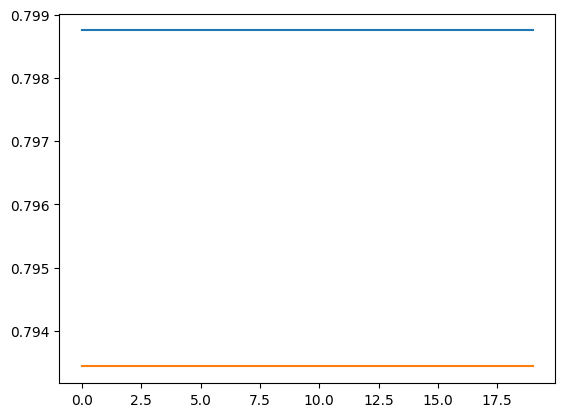

In [122]:
sns.lineplot(history.history['val_accuracy'])
sns.lineplot(history.history['accuracy'])